In [1]:
import sacpy as scp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sst = scp.load_sst()["sst"]
ssta = scp.get_anom(sst, method=0)
ssta_djf = scp.XrTools.spec_moth_yrmean(ssta,[12,1,2])

<xarray.DataArray 'sst' ()>
array(1.01669312)


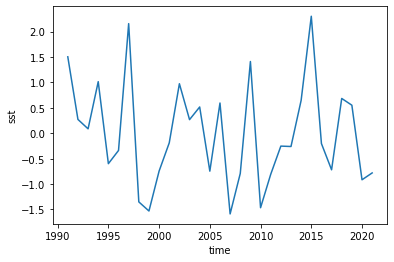

In [5]:
Nino34 = ssta_djf.loc[:, -5:5, 190:240].mean(axis=(1, 2))
print(Nino34.std())
Nino34.plot()

In [6]:
select = Nino34 >= 1
ssta_sl = ssta_djf[select]
mean, pv = scp.one_mean_test(np.array(ssta_sl))

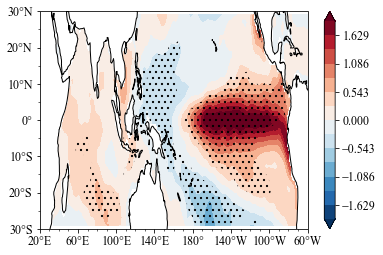

In [10]:
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from matplotlib.ticker import MultipleLocator
import cartopy.crs as ccrs
plt.rc('font', family='Times New Roman', size=12)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
m = ax.contourf(ssta.lon,
                ssta.lat,
                mean,
                cmap="RdBu_r",
                levels=np.linspace(-1.9, 1.9, 15),
                extend="both",
                transform=ccrs.PlateCarree())
n = plt.contourf(ssta.lon,
                 ssta.lat,
                 pv,
                 levels=[0, 0.05, 1],
                 zorder=1,
                 hatches=['..', None],
                 colors="None",
                 transform=ccrs.PlateCarree())
# xtk = np.arange(-180,181,60)
xtk = np.arange(20,301,40)
ax.set_xticks(xtk,crs=ccrs.PlateCarree())
# ax.set_xticks(xtk,crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(-30,31,10),crs=ccrs.PlateCarree())
ax.yaxis.set_major_formatter(LatitudeFormatter())
ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(MultipleLocator(5))
ax.coastlines()
ax.set_aspect("auto")
plt.colorbar(m)
plt.savefig("../pic/one_test.png")

In [16]:
select1 = (Nino34 >= 0.8) & (Nino34 < 1.1)
ssta_sl1 = ssta_djf[select1]
select2 = Nino34 >= 1.3
ssta_sl2 = ssta_djf[select2]
mean_diff, pv2 = scp.two_mean_test(np.array(ssta_sl2),np.array(ssta_sl1))

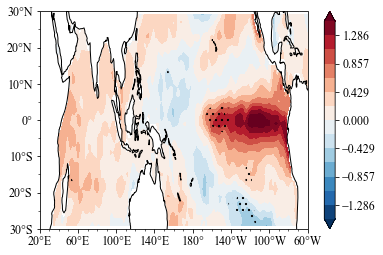

In [18]:
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from matplotlib.ticker import MultipleLocator
import cartopy.crs as ccrs
plt.rc('font', family='Times New Roman', size=12)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
m = ax.contourf(ssta.lon,
                ssta.lat,
                mean_diff,
                cmap="RdBu_r",
                levels=np.linspace(-1.5, 1.5, 15),
                extend="both",
                transform=ccrs.PlateCarree())
n = plt.contourf(ssta.lon,
                 ssta.lat,
                 pv2,
                 levels=[0, 0.05, 1],
                 zorder=1,
                 hatches=['..', None],
                 colors="None",
                 transform=ccrs.PlateCarree())
# xtk = np.arange(-180,181,60)
xtk = np.arange(20,301,40)
ax.set_xticks(xtk,crs=ccrs.PlateCarree())
# ax.set_xticks(xtk,crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(-30,31,10),crs=ccrs.PlateCarree())
ax.yaxis.set_major_formatter(LatitudeFormatter())
ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(MultipleLocator(5))
ax.coastlines()
ax.set_aspect("auto")
plt.colorbar(m)
plt.savefig("../pic/two_test.png")